<a href="https://colab.research.google.com/github/kvnnn14/ML-Heart/blob/main/SC60515_Kevin_Alexsandro_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

PENJELASAN KOLOM YANG ADA DI DATA

AGE – umur dalam tahun

SEX - (1 = Laki-laki ; 0 = perempuan)

CP - chest pain type (tipe nyeri dada)

* 1: Atypical angina (Angina atipikal): nyeri dada yang tidak berhubungan dengan jantung
* 2: Non-anginal pain (Nyeri non-angina): biasanya kejang esofagus (tidak berhubungan dengan jantung)
* 3 : Asymptomatic (Tanpa gejala): nyeri dada tidak menunjukkan tanda-tanda penyakit

TRESTBPS - tekanan darah istirahat (dalam mm Hg) di atas 130-140 biasanya menimbulkan kekhawatiran

CHOL -  serum kolestoral dalam mg/dl

* serum = LDL + HDL + .2 * trigliserida
* di atas 200 memprihatinkan

FBS - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* >126 mg/dL menandakan diabetes

RESTECG - resting electrocardiographic results (hasil elektrokardiografi istirahat)

* 0: Nothing to note (Tidak ada yang perlu diperhatikan)
* 1 : ST-T Wave abnormality (Kelainan Gelombang ST-T)
    * dapat berkisar dari gejala ringan hingga masalah parah
    * menandakan detak jantung tidak normal
* 2: Possible or definite left ventricular hypertrophy (Kemungkinan atau pasti hipertrofi ventrikel kiri)
    * Ruang pemompaan utama jantung membesar

THALACH - maximum heart rate achieved (detak jantung maksimum tercapai

EXANG - exercise induced angina (1 = yes; 0 = no)

OLDPEAK - Depresi ST yang disebabkan oleh olahraga dibandingkan dengan istirahat terlihat pada stres jantung saat berolahraga. Jantung yang tidak sehat akan lebih stres

SLOPE - kemiringan puncak latihan segmen ST

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

CA - number of major vessels (0-3) colored by flourosopy

* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)

THAL - thalium stress result (hasil stres talium)

* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

#### DATA PREPARATION

In [ ]:
df.isnull().sum() # check missing values dan atasi jika ada

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

dari keseluruhan data tidak terdapat missing values

In [ ]:
### Menampilkan jumlah duplicates values dan atasi jika ada
df.duplicated().sum()

723

terdapat 723 missing values

In [ ]:
n = df.duplicated().sum()  # replace with the desired number
duplicated_rows = df[df.duplicated()].head(n)
duplicated_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
duplicated_rows.sort_values(by='age').head(20) # duplicates values berdasarkan umur

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
699,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
298,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
912,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0


menampilkan duplicates values berdasarkan umur

In [ ]:
### Menghapus duplicates values
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


total semua baris = 1025

total duplicate values = 723

total setelah dihapus = 302

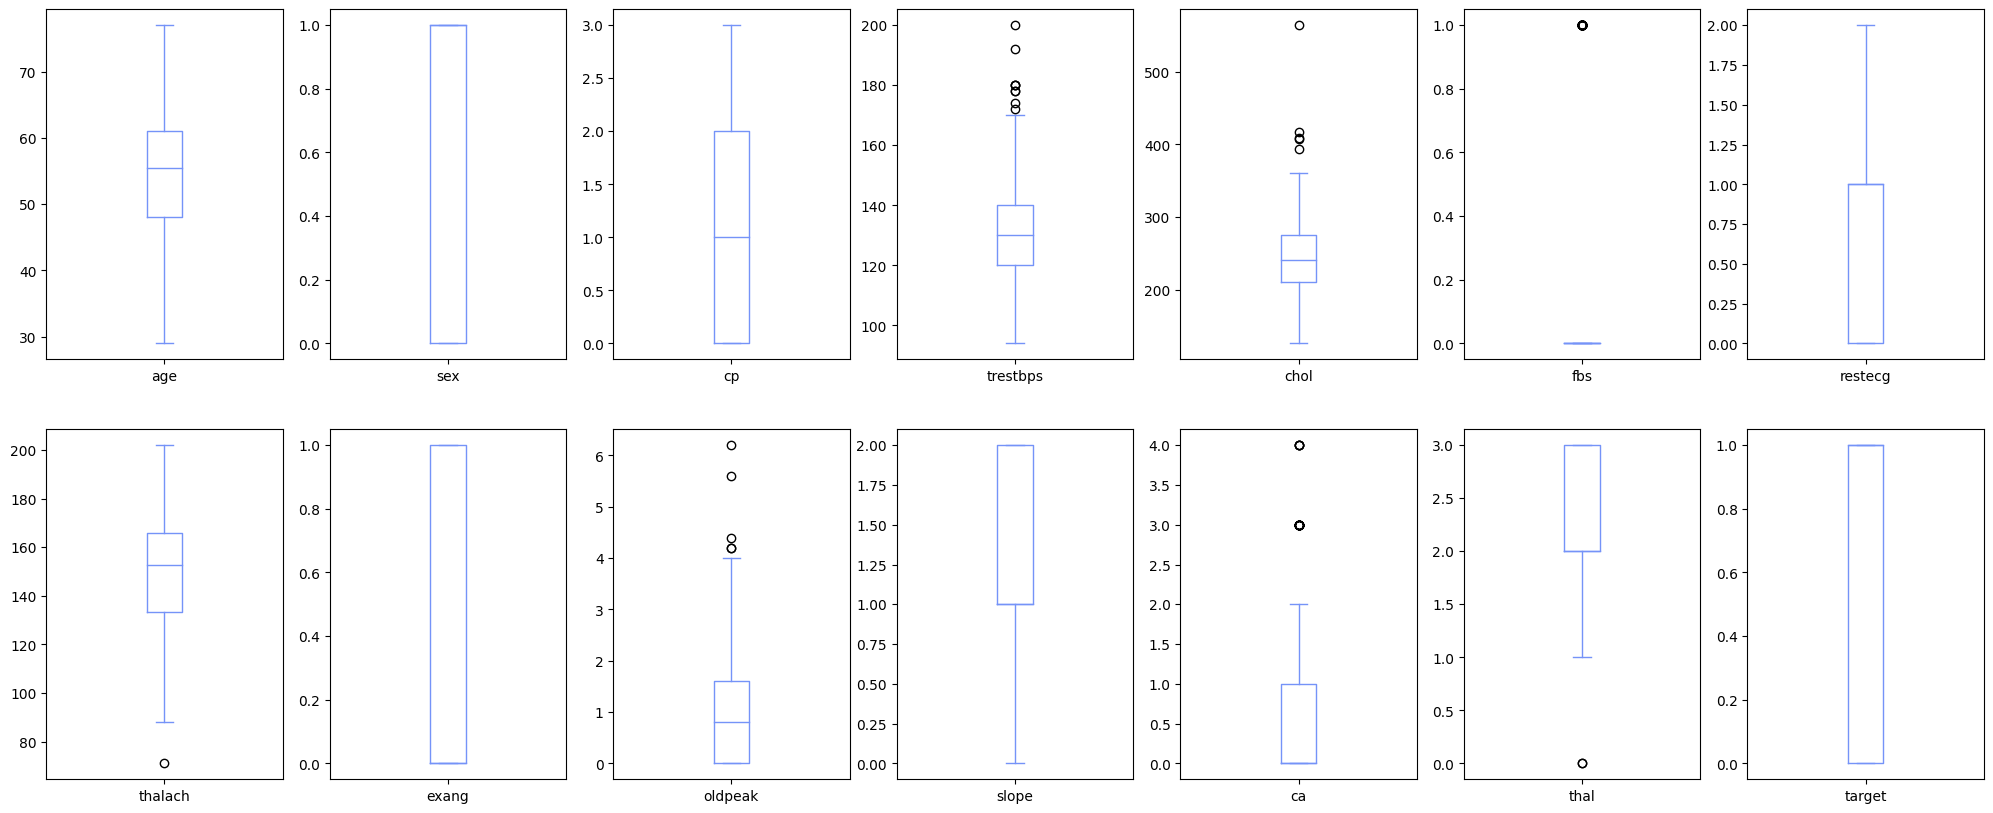

In [ ]:
## OUTLIER
# visualisasi boxplot untuk cek outlier
df.plot(kind = 'box', subplots = True, layout = (2,7),
sharex = False, sharey = False, figsize = (25, 10), color = '#7593F8');

In [ ]:
# MENGHAPUS OUTLIER JIKA PERLU
continuous_features = ['age','trestbps','chol','thalach','oldpeak']

def remove_outliers(df, continuous_features):
    for feature in continuous_features:
        # Calculate the 25th and 75th percentiles (Q1 and Q3)
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        # Define the outlier step
        outlier_step = 1.5 * IQR
        # tentukan outlier
        outliers = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)]
        # hapus outlier dari dataframe
        df = df[~df.isin(outliers)].dropna()
        # print nomor outlier yang terdeteksi lalu hapus
        print('Jumlah outliers yang terhitung dan dihapus dari {} feature: {}'.format(feature, outliers.shape[0]))

    return df

# hapus outlier dari dataset
df_clean = remove_outliers(df, continuous_features)
df_clean

# syntax dari sumber pembelajaran

Jumlah outliers yang terhitung dan dihapus dari age feature: 0
Jumlah outliers yang terhitung dan dihapus dari trestbps feature: 9
Jumlah outliers yang terhitung dan dihapus dari chol feature: 5
Jumlah outliers yang terhitung dan dihapus dari thalach feature: 1
Jumlah outliers yang terhitung dan dihapus dari oldpeak feature: 4


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0.0,2.0,120.0,211.0,0.0,0.0,115.0,0.0,1.5,1.0,0.0,2.0,1.0
733,44.0,0.0,2.0,108.0,141.0,0.0,1.0,175.0,0.0,0.6,1.0,0.0,2.0,1.0
739,52.0,1.0,0.0,128.0,255.0,0.0,1.0,161.0,1.0,0.0,2.0,1.0,3.0,0.0
843,59.0,1.0,3.0,160.0,273.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,2.0,0.0


In [ ]:
### Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
x = df_clean.drop(['target'], axis=1)
y = df_clean['target']

In [ ]:
y.value_counts()

target
1.0    158
0.0    125
Name: count, dtype: int64

Dapat dilihat bahwa datanya cukup berimbang. Terdapat 158 ​​(55,8%) pasien penyakit jantung dengan angka 1, dan 125 (44,2%) pasien tanpa penyakit jantung dengan angka 0.

#### EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
#### Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
# nominal dan ordinal = categorical, numerical = numerik
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
categorical_values = []
numerical_values = []

for column in df.columns:
    if df[column].nunique() <10:
        categorical_values.append(column)
    else:
        numerical_values.append(column)

print("Tipe Kategorikal values: ", categorical_values)
print("Tipe Numerical Values: ", numerical_values)

Tipe Kategorikal values:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Tipe Numerical Values:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
Mean (Rata-rata):

Kondisi Penggunaan: Mean digunakan untuk mengukur nilai tengah dari distribusi data. Ini cocok digunakan untuk data yang terdistribusi secara normal atau mendekati distribusi normal.
Penggunaan: Mean dapat digunakan untuk menghitung rata-rata usia pasien, tekanan darah saat istirahat, kadar kolesterol serum, detak jantung maksimum, dan depresi ST yang disebabkan oleh latihan relatif terhadap istirahat. Ini memberikan gambaran tentang nilai tengah dari masing-masing fitur numerik dalam dataset.

Median:


Kondisi Penggunaan: Median digunakan ketika data memiliki distribusi yang cenderung skew (miring) atau terdapat outlier yang signifikan. Median lebih tahan terhadap outlier daripada mean.
Penggunaan: Median dapat digunakan untuk mengukur nilai tengah dari usia pasien, tekanan darah saat istirahat, kadar kolesterol serum, detak jantung maksimum, dan depresi ST yang disebabkan oleh latihan relatif terhadap istirahat. Ini memberikan alternatif yang lebih stabil terhadap mean jika ada kekhawatiran tentang adanya outlier dalam dataset.


Modus (Nilai Paling Sering Muncul):


Kondisi Penggunaan: Modus digunakan untuk mengidentifikasi nilai yang paling sering muncul dalam distribusi data. Ini berguna terutama untuk data kategorikal.
Pengunaan: Modus dapat digunakan untuk mengidentifikasi jenis nyeri dada yang paling umum dialami oleh pasien (dalam fitur 'cp'), hasil elektrokardiografi istirahat yang paling sering muncul (dalam fitur 'restecg'), dan kategori thalassemia yang paling umum (dalam fitur 'thal').

In [ ]:
### Menemukan dan mendeskripsikan statistical five summaries
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df_clean.describe().T ## setelah dibersihkan

,count,mean,std,min,25%,50%,75%,max
age,283.0,54.049470,9.128186,29.0,47.0,55.0,60.0,77.0
sex,283.0,0.699647,0.459224,0.0,0.0,1.0,1.0,1.0
cp,283.0,0.985866,1.031324,0.0,0.0,1.0,2.0,3.0
trestbps,283.0,129.883392,15.387795,94.0,120.0,130.0,140.0,170.0
chol,283.0,242.314488,44.654188,126.0,210.5,239.0,270.5,360.0
fbs,283.0,0.141343,0.348992,0.0,0.0,0.0,0.0,1.0
restecg,283.0,0.522968,0.514336,0.0,0.0,1.0,1.0,2.0
thalach,283.0,149.961131,22.691625,88.0,133.5,153.0,168.0,202.0
exang,283.0,0.318021,0.466533,0.0,0.0,0.0,1.0,1.0
oldpeak,283.0,0.951943,1.026400,0.0,0.0,0.6,1.6,4.0


Setelah kita menghapus outlier dan mengisi nilai yang hilang dengan median, kita dapat melihat bahwa nilai dalam ringkasan statistik telah berubah.

age: Usia rata-rata pasien adalah sekitar 54 tahun, dengan usia termuda 29 tahun dan tertua 77 tahun.

trestbps: Tekanan darah istirahat rata-rata sekitar 129,88 mmHg, berkisar antara 94 hingga 170 mmHg.

col: Kadar kolesterol rata-rata sekitar 242,31 mg/dl, dengan minimum 126 dan maksimum 360 mg/dl.

thalach: Rata-rata detak jantung maksimum yang dicapai sekitar 149,96, dengan kisaran dari 88 hingga 202.

oldpeak: Rata-rata depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat adalah sekitar 0,95, dengan nilai berkisar antara 0 hingga 4.

In [ ]:
# Mendeskripsikan distribusi data
features_for_EDA = ["age", "trestbps", "chol", "thalach", "oldpeak"]

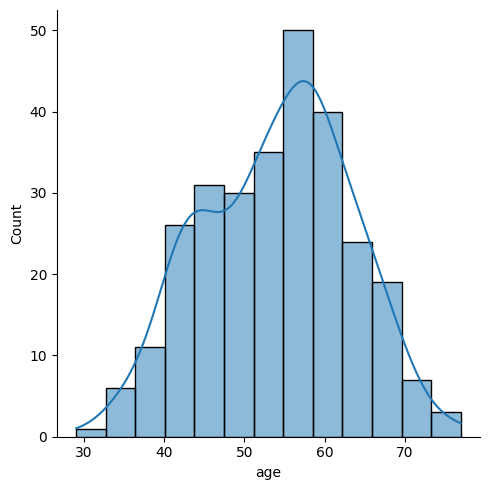

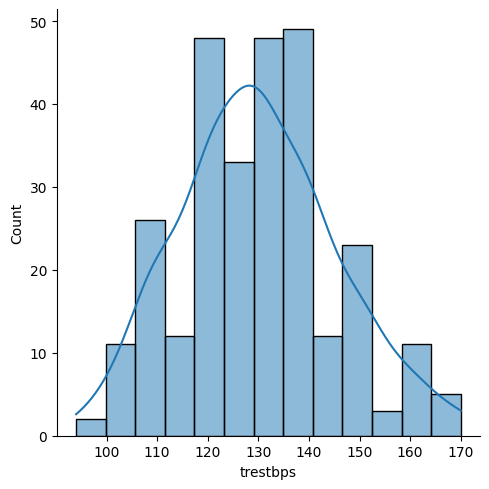

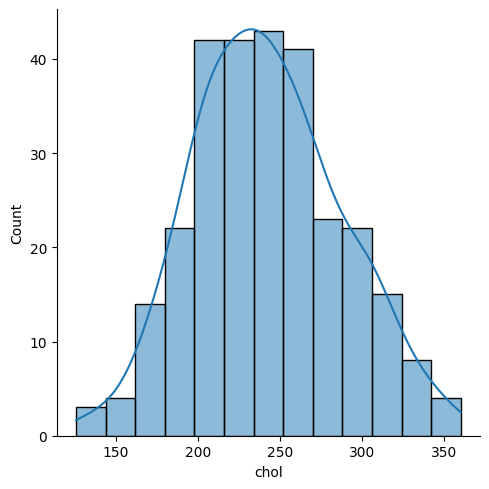

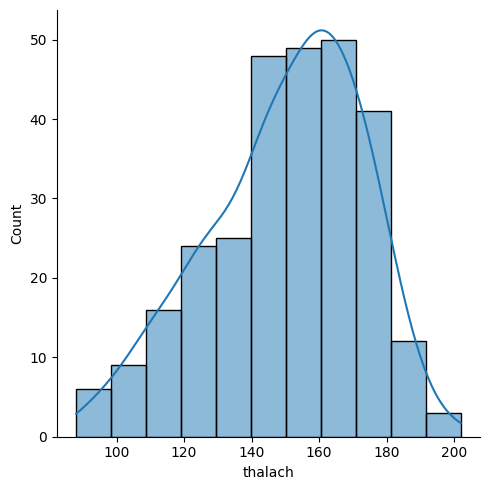

In [ ]:
#VISUALISASI DISTRIBUSI DALAM FITUR-FITUR TERPILIH YANG TIDAK TERMASUK NILAI-NILAI kategorikal
for feature in features_for_EDA[:-1]:
    sns.displot(df_clean[feature], kde = True)

Insight:

age (umur): Distribusinya agak seragam, tetapi ada puncaknya di sekitar akhir usia 50-an. Usia rata-rata sekitar 54,04 tahun dengan deviasi standar 9 tahun.

trestbps (Tekanan Darah Istirahat): Tekanan darah istirahat untuk sebagian besar individu terkonsentrasi di sekitar 120-140 mmHg, dengan rata-rata sekitar 129,88 mmHg dan deviasi standar 15,38 mmHg.

chol (Kolesterol Serum): Sebagian besar orang memiliki kadar kolesterol antara 200 dan 300 mg/dl. Kadar kolesterol rata-rata adalah sekitar 242,31 mg/dl dengan deviasi standar 44,65 mg/dl.

thalach (Denyut Jantung Maksimum yang Dicapai): Mayoritas individu mencapai detak jantung antara 140 dan 170 bpm selama tes stres. Denyut jantung rata-rata yang dicapai adalah sekitar 149.96 bpm dengan deviasi standar 22.69 bpm.

oldpeak (Depresi ST yang Diinduksi oleh Latihan): Sebagian besar nilai terkonsentrasi pada angka 0, yang menunjukkan bahwa banyak individu tidak mengalami depresi ST yang signifikan selama berolahraga. Nilai rata-rata depresi ST adalah 0.95 dengan standar deviasi 1.02.

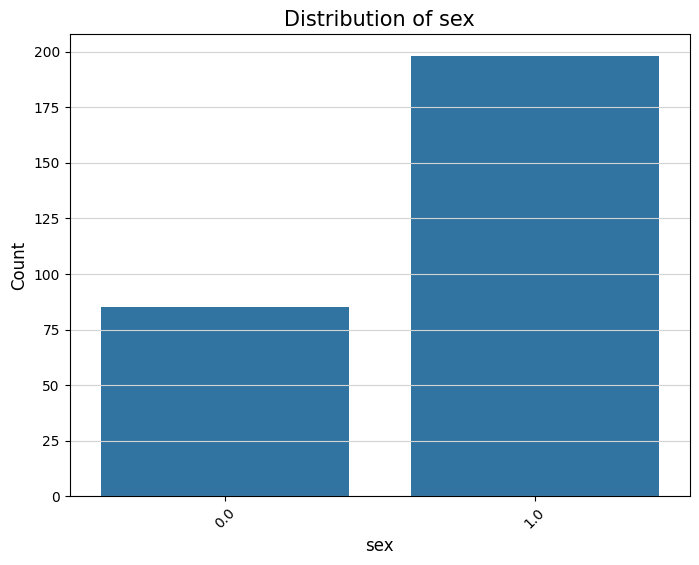

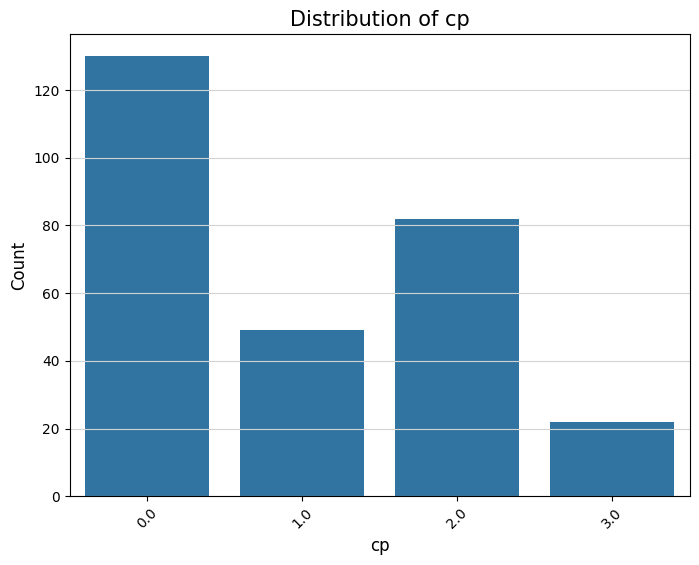

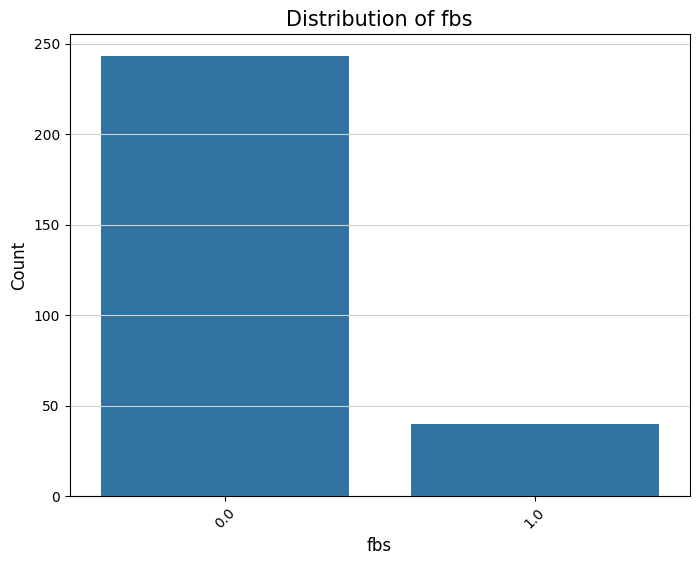

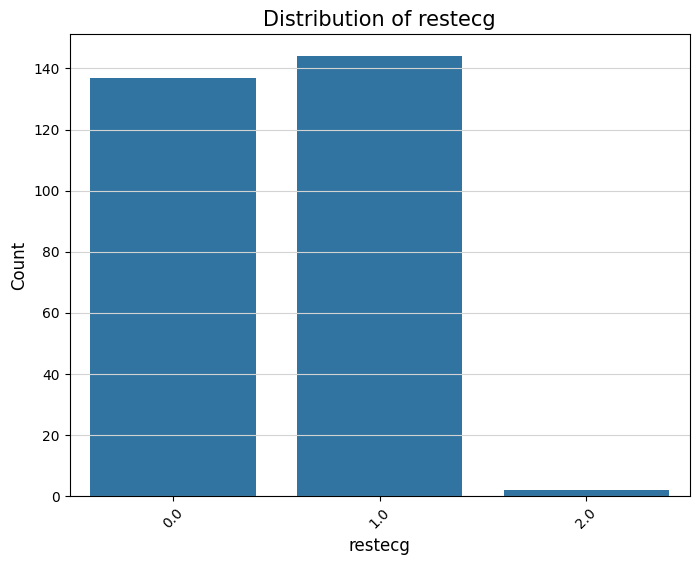

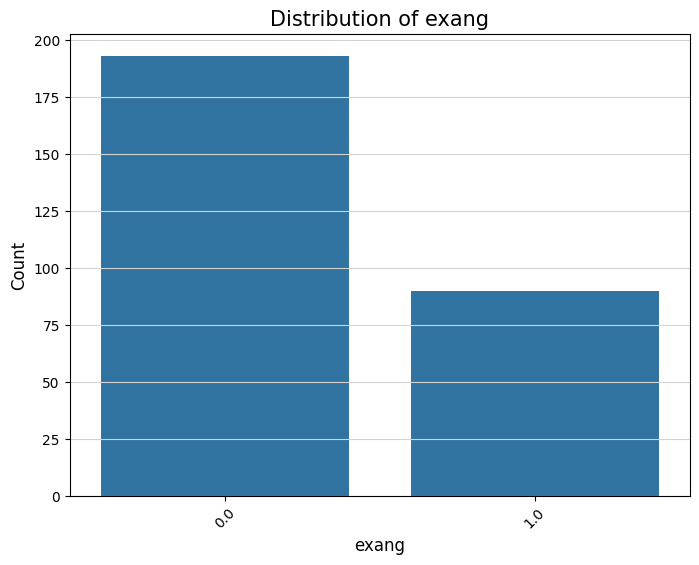

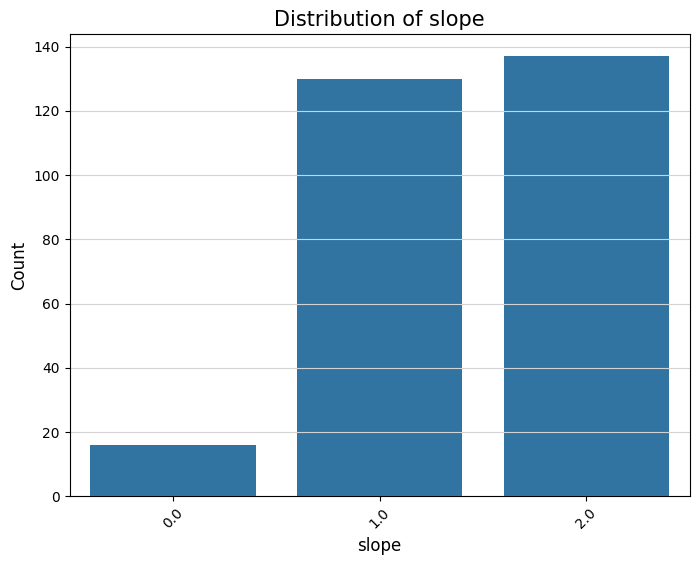

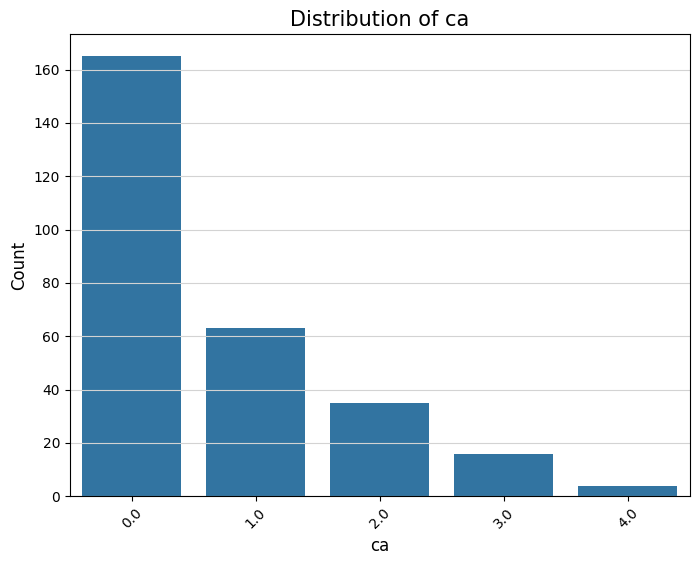

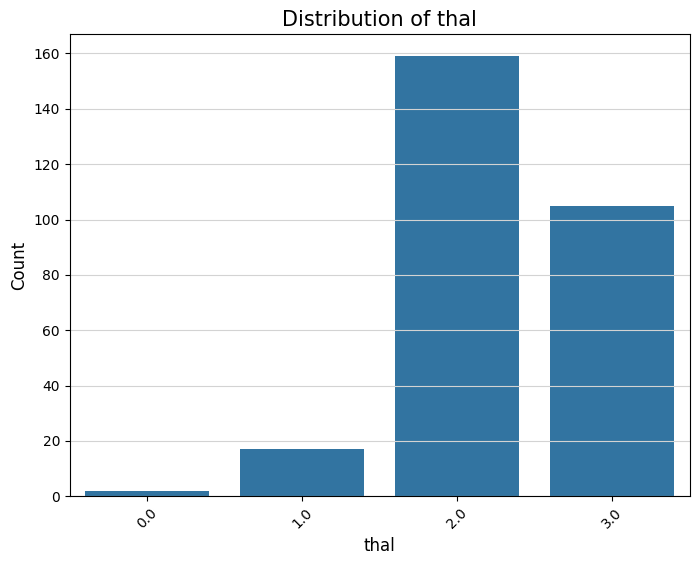

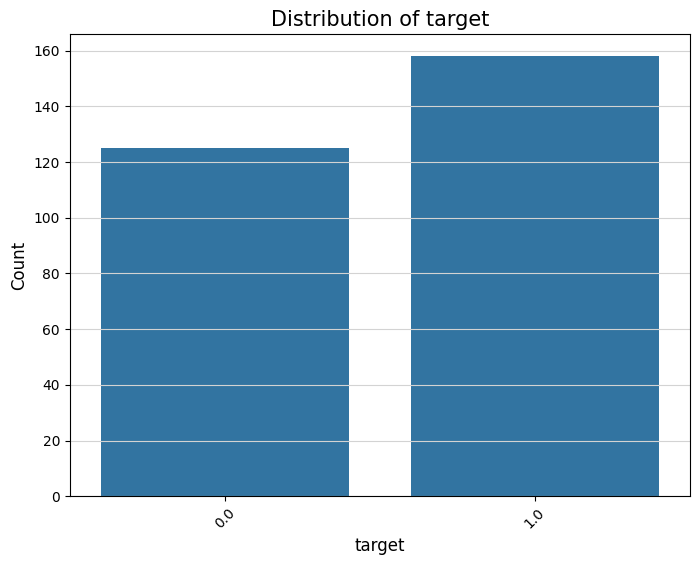

In [ ]:
# Membuat plot untuk setiap fitur kategorikal
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', "target"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_clean, x=feature)
    plt.title('Distribution of ' + feature, fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', color='lightgrey')
    plt.show()

Text(0.5, 1.0, 'Correlation Between Features')

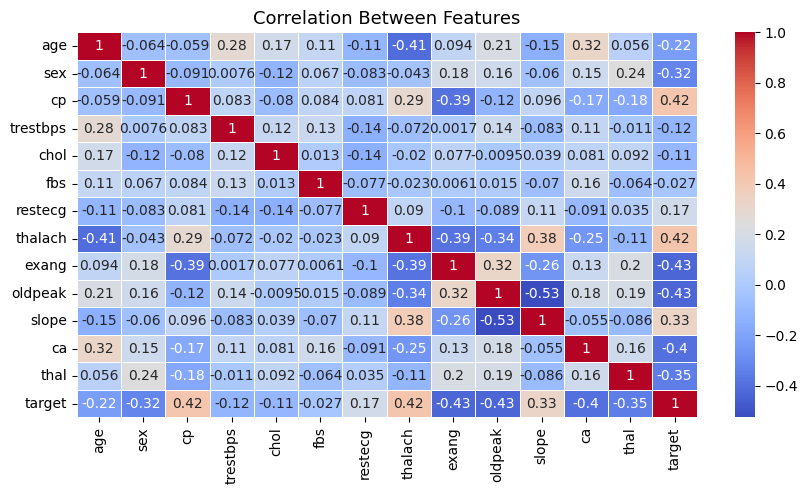

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(df_clean.corr(), annot = True, linewidths = 0.5, cmap = "coolwarm")
plt.title('Correlation Between Features' , fontsize = 13)

Korelasi positif tertinggi terlihat:
cp dan target (0,42)
thalach dan target (0,42)
thalach dan slope (0,39)

Korelasi negatif tertinggi terlihat:
oldpeak dan slope (-0,53)
oldpeak dan target (-0,43)
exang dan target (-0,43)

#### FEATURE ENGINEERING

membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membuat langkah preventif untuk mengurangi dampak dari heart disease tersebut.


**Feature Construction**

Create new Features with domain knowledge

cp_category

thal_category

restecg_category

Encoding Categorical Column (Nominal Categorical)

In [ ]:
data_fc=df_clean.copy() # salinan df_clean

In [ ]:
# Transformasi fitur 'restecg' menjadi kategori baru
data_fc["cp_category"] = data_fc["cp"].map({0: "typical angina", 1: "atypical angina", 2: "non-anginal pain", 3: "asymptomatic"})
# Transformasi fitur 'restecg' menjadi kategori baru
data_fc["thal_category"] = data_fc["thal"].map({0: "Normal", 1: "Fixed defect", 2: "Reversible defect", 3: "Not described"})
# Transformasi fitur 'restecg' menjadi kategori baru
data_fc["restecg_category"] = data_fc["restecg"].map({0: "Normal", 1: "ST-T Abnormality", 2: "Left Ventricular Hypertrophy"})
# Transformasi fitur 'restecg' menjadi kategori baru
data_fc["sex_category"] = data_fc["sex"].map({1: "Laki-laki", 0: "Perempuan"})
data_fc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category,thal_category,restecg_category,age_group,sex_category
0,-0.224919,1.0,0.0,-0.317917,-0.680075,0.0,1.0,0.796365,0.0,0.046903,2.0,2.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Dewasa,Laki-laki
1,-0.115174,1.0,0.0,0.658608,-0.881981,1.0,0.0,0.222452,1.0,2.096513,0.0,0.0,3.0,0.0,typical angina,Not described,Normal,Dewasa,Laki-laki
2,1.750489,1.0,0.0,0.984117,-1.532566,0.0,1.0,-1.101964,1.0,1.608511,0.0,0.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Lansia,Laki-laki
3,0.762785,1.0,0.0,1.179422,-0.881981,0.0,1.0,0.487335,0.0,-0.929101,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Lansia,Laki-laki
4,0.872530,0.0,0.0,0.528405,1.159512,1.0,1.0,-1.940760,0.0,0.925307,1.0,3.0,2.0,0.0,typical angina,Reversible defect,ST-T Abnormality,Lansia,Perempuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.530999,0.0,2.0,-0.643426,-0.702509,0.0,0.0,-1.543436,0.0,0.534906,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,Normal,Lansia,Perempuan
733,-1.102878,0.0,2.0,-1.424646,-2.272888,0.0,1.0,1.105396,0.0,-0.343498,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,ST-T Abnormality,Dewasa,Perempuan
739,-0.224919,1.0,0.0,-0.122612,0.284587,0.0,1.0,0.487335,1.0,-0.929101,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Dewasa,Laki-laki
843,0.543295,1.0,3.0,1.960642,0.688398,0.0,0.0,-1.101964,0.0,-0.929101,2.0,0.0,2.0,0.0,asymptomatic,Reversible defect,Normal,Lansia,Laki-laki


In [ ]:
# batasan untuk setiap kelompok
bins = [0, 4, 9, 18, 59, 100]  # batasan usia untuk anak-anak, remaja, dewasa, dan lansia
labels = ['Balita', 'Anak-anak', 'Remaja', 'Dewasa', 'Lansia']  # label untuk setiap kelompok

# Tambahkan kolom baru yang menunjukkan kelompok usia
data_fc['age_group'] = pd.cut(data_fc['age'], bins=bins, labels=labels, right=False)
data_fc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category,thal_category,restecg_category,age_group,sex_category
0,-0.224919,1.0,0.0,-0.317917,-0.680075,0.0,1.0,0.796365,0.0,0.046903,2.0,2.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,NaN,Laki-laki
1,-0.115174,1.0,0.0,0.658608,-0.881981,1.0,0.0,0.222452,1.0,2.096513,0.0,0.0,3.0,0.0,typical angina,Not described,Normal,NaN,Laki-laki
2,1.750489,1.0,0.0,0.984117,-1.532566,0.0,1.0,-1.101964,1.0,1.608511,0.0,0.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Balita,Laki-laki
3,0.762785,1.0,0.0,1.179422,-0.881981,0.0,1.0,0.487335,0.0,-0.929101,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Balita,Laki-laki
4,0.872530,0.0,0.0,0.528405,1.159512,1.0,1.0,-1.940760,0.0,0.925307,1.0,3.0,2.0,0.0,typical angina,Reversible defect,ST-T Abnormality,Balita,Perempuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.530999,0.0,2.0,-0.643426,-0.702509,0.0,0.0,-1.543436,0.0,0.534906,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,Normal,Balita,Perempuan
733,-1.102878,0.0,2.0,-1.424646,-2.272888,0.0,1.0,1.105396,0.0,-0.343498,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,ST-T Abnormality,NaN,Perempuan
739,-0.224919,1.0,0.0,-0.122612,0.284587,0.0,1.0,0.487335,1.0,-0.929101,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,NaN,Laki-laki
843,0.543295,1.0,3.0,1.960642,0.688398,0.0,0.0,-1.101964,0.0,-0.929101,2.0,0.0,2.0,0.0,asymptomatic,Reversible defect,Normal,Balita,Laki-laki


**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [ ]:
# Scaling fitur-fitur yang dipilih
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
data_fc['age'] = std_scale.fit_transform(data_fc[['age']])
data_fc['trestbps'] = std_scale.fit_transform(data_fc[['trestbps']])
data_fc['chol'] = std_scale.fit_transform(data_fc[['chol']])
data_fc['thalach'] = std_scale.fit_transform(data_fc[['thalach']])
data_fc['oldpeak'] = std_scale.fit_transform(data_fc[['oldpeak']])
data_fc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category,thal_category,restecg_category,age_group
0,-0.224919,1.0,0.0,-0.317917,-0.680075,0.0,1.0,0.796365,0.0,0.046903,2.0,2.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Dewasa
1,-0.115174,1.0,0.0,0.658608,-0.881981,1.0,0.0,0.222452,1.0,2.096513,0.0,0.0,3.0,0.0,typical angina,Not described,Normal,Dewasa
2,1.750489,1.0,0.0,0.984117,-1.532566,0.0,1.0,-1.101964,1.0,1.608511,0.0,0.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Lansia
3,0.762785,1.0,0.0,1.179422,-0.881981,0.0,1.0,0.487335,0.0,-0.929101,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Lansia
4,0.872530,0.0,0.0,0.528405,1.159512,1.0,1.0,-1.940760,0.0,0.925307,1.0,3.0,2.0,0.0,typical angina,Reversible defect,ST-T Abnormality,Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.530999,0.0,2.0,-0.643426,-0.702509,0.0,0.0,-1.543436,0.0,0.534906,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,Normal,Lansia
733,-1.102878,0.0,2.0,-1.424646,-2.272888,0.0,1.0,1.105396,0.0,-0.343498,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,ST-T Abnormality,Dewasa
739,-0.224919,1.0,0.0,-0.122612,0.284587,0.0,1.0,0.487335,1.0,-0.929101,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Dewasa
843,0.543295,1.0,3.0,1.960642,0.688398,0.0,0.0,-1.101964,0.0,-0.929101,2.0,0.0,2.0,0.0,asymptomatic,Reversible defect,Normal,Lansia


In [ ]:
data_fc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 878
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               283 non-null    float64 
 1   sex               283 non-null    float64 
 2   cp                283 non-null    float64 
 3   trestbps          283 non-null    float64 
 4   chol              283 non-null    float64 
 5   fbs               283 non-null    float64 
 6   restecg           283 non-null    float64 
 7   thalach           283 non-null    float64 
 8   exang             283 non-null    float64 
 9   oldpeak           283 non-null    float64 
 10  slope             283 non-null    float64 
 11  ca                283 non-null    float64 
 12  thal              283 non-null    float64 
 13  target            283 non-null    float64 
 14  cp_category       283 non-null    object  
 15  thal_category     283 non-null    object  
 16  restecg_category  283 non-null 

In [ ]:
# Perform one-hot encoding on the "ocean_proximity" column
data_encoded = pd.get_dummies(data_fc, columns=['cp_category','thal_category', 'restecg_category', 'age_group'], prefix=['cp_category','thal_category', 'restecg_category', 'age_group'])
data_encoded

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_category_Not described,thal_category_Reversible defect,restecg_category_Left Ventricular Hypertrophy,restecg_category_Normal,restecg_category_ST-T Abnormality,age_group_Balita,age_group_Anak-anak,age_group_Remaja,age_group_Dewasa,age_group_Lansia
0,-0.224919,1.0,0.0,-0.317917,-0.680075,0.0,1.0,0.796365,0.0,0.046903,...,True,False,False,False,True,False,False,False,True,False
1,-0.115174,1.0,0.0,0.658608,-0.881981,1.0,0.0,0.222452,1.0,2.096513,...,True,False,False,True,False,False,False,False,True,False
2,1.750489,1.0,0.0,0.984117,-1.532566,0.0,1.0,-1.101964,1.0,1.608511,...,True,False,False,False,True,False,False,False,False,True
3,0.762785,1.0,0.0,1.179422,-0.881981,0.0,1.0,0.487335,0.0,-0.929101,...,True,False,False,False,True,False,False,False,False,True
4,0.872530,0.0,0.0,0.528405,1.159512,1.0,1.0,-1.940760,0.0,0.925307,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.530999,0.0,2.0,-0.643426,-0.702509,0.0,0.0,-1.543436,0.0,0.534906,...,False,True,False,True,False,False,False,False,False,True
733,-1.102878,0.0,2.0,-1.424646,-2.272888,0.0,1.0,1.105396,0.0,-0.343498,...,False,True,False,False,True,False,False,False,True,False
739,-0.224919,1.0,0.0,-0.122612,0.284587,0.0,1.0,0.487335,1.0,-0.929101,...,True,False,False,False,True,False,False,False,True,False
843,0.543295,1.0,3.0,1.960642,0.688398,0.0,0.0,-1.101964,0.0,-0.929101,...,False,True,False,True,False,False,False,False,False,True


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 878
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            283 non-null    float64
 1   sex                                            283 non-null    float64
 2   cp                                             283 non-null    float64
 3   trestbps                                       283 non-null    float64
 4   chol                                           283 non-null    float64
 5   fbs                                            283 non-null    float64
 6   restecg                                        283 non-null    float64
 7   thalach                                        283 non-null    float64
 8   exang                                          283 non-null    float64
 9   oldpeak                                        283 non-null

In [ ]:
# memisahkan input (X) dan target/output (y)
y_target = data_encoded['target']
X_features = data_encoded.drop(['target'], axis = 1)

In [ ]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 1)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_category_Not described,thal_category_Reversible defect,restecg_category_Left Ventricular Hypertrophy,restecg_category_Normal,restecg_category_ST-T Abnormality,age_group_Balita,age_group_Anak-anak,age_group_Remaja,age_group_Dewasa,age_group_Lansia
70,0.543295,1.0,0.0,2.611659,1.877400,0.0,0.0,-0.439756,1.0,2.389314,...,True,False,False,True,False,False,False,False,False,True
239,0.872530,0.0,0.0,1.309625,0.037813,0.0,1.0,0.178305,1.0,0.437305,...,False,True,False,False,True,False,False,False,False,True
39,0.323805,1.0,2.0,-0.122612,-0.298697,0.0,0.0,0.001716,0.0,-0.538699,...,True,False,False,True,False,False,False,False,True,False
60,-2.749050,1.0,1.0,0.007591,-0.859547,0.0,0.0,2.297370,0.0,-0.929101,...,False,True,False,True,False,False,False,False,True,False
228,-0.224919,1.0,1.0,-0.122612,-0.837113,1.0,1.0,1.502720,0.0,-0.929101,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,1.750489,1.0,0.0,0.007591,1.787664,0.0,0.0,-1.808319,0.0,1.413310,...,False,True,False,True,False,False,False,False,False,True
536,-0.444408,0.0,2.0,-0.643426,-0.523037,0.0,1.0,0.354893,0.0,0.632506,...,False,True,False,False,True,False,False,False,True,False
90,-0.005429,0.0,2.0,-1.424646,0.553794,0.0,0.0,0.752218,0.0,-0.929101,...,False,True,False,True,False,False,False,False,True,False
426,-0.005429,0.0,2.0,1.960642,-0.926849,0.0,1.0,0.575629,0.0,-0.929101,...,False,True,False,False,True,False,False,False,True,False


In [ ]:
y_train

70     0.0
239    0.0
39     0.0
60     1.0
228    1.0
      ... 
328    0.0
536    1.0
90     1.0
426    1.0
42     0.0
Name: target, Length: 226, dtype: float64

In [ ]:
data_fc.to_csv('Heart_clean.csv')

In [ ]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0


In [ ]:
# Transformasi fitur 'cp' menjadi kategori baru
df_clean["cp_category"] = df_clean["cp"].map({0: "typical angina", 1: "atypical angina", 2: "non-anginal pain", 3: "asymptomatic"})
# Transformasi fitur 'thal' menjadi kategori baru
df_clean["thal_category"] = df_clean["thal"].map({0: "Normal", 1: "Fixed defect", 2: "Reversible defect", 3: "Not described"})
# Transformasi fitur 'restecg' menjadi kategori baru
df_clean["restecg_category"] = df_clean["restecg"].map({0: "Normal", 1: "ST-T Abnormality", 2: "Left Ventricular Hypertrophy"})
# Transformasi fitur 'sex' menjadi kategori baru
df_clean["sex_category"] = df_clean["sex"].map({1: "Laki-laki", 0: "Perempuan"})
# Transformasi fitur 'target' menjadi kategori baru
df_clean["target_category"] = df_clean["target"].map({1: "Have Heart disease", 0: "Not have Heart disease"})


df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category,thal_category,restecg_category,sex_category,target_category
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Laki-laki,Not have Heart disease
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0,typical angina,Not described,Normal,Laki-laki,Not have Heart disease
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Laki-laki,Not have Heart disease
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Laki-laki,Not have Heart disease
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0,typical angina,Reversible defect,ST-T Abnormality,Perempuan,Not have Heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0.0,2.0,120.0,211.0,0.0,0.0,115.0,0.0,1.5,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,Normal,Perempuan,Have Heart disease
733,44.0,0.0,2.0,108.0,141.0,0.0,1.0,175.0,0.0,0.6,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,ST-T Abnormality,Perempuan,Have Heart disease
739,52.0,1.0,0.0,128.0,255.0,0.0,1.0,161.0,1.0,0.0,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Laki-laki,Not have Heart disease
843,59.0,1.0,3.0,160.0,273.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,2.0,0.0,asymptomatic,Reversible defect,Normal,Laki-laki,Not have Heart disease


In [ ]:
# batasan untuk setiap kelompok
bins = [0, 4, 9, 18, 59, 100]  # batasan usia untuk anak-anak, remaja, dewasa, dan lansia
labels = ['Balita', 'Anak-anak', 'Remaja', 'Dewasa', 'Lansia']  # label untuk setiap kelompok

# Tambahkan kolom baru yang menunjukkan kelompok usia
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)
df_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category,thal_category,restecg_category,sex_category,target_category,age_group
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Laki-laki,Not have Heart disease,Dewasa
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0,typical angina,Not described,Normal,Laki-laki,Not have Heart disease,Dewasa
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Laki-laki,Not have Heart disease,Lansia
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Laki-laki,Not have Heart disease,Lansia
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0,typical angina,Reversible defect,ST-T Abnormality,Perempuan,Not have Heart disease,Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68.0,0.0,2.0,120.0,211.0,0.0,0.0,115.0,0.0,1.5,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,Normal,Perempuan,Have Heart disease,Lansia
733,44.0,0.0,2.0,108.0,141.0,0.0,1.0,175.0,0.0,0.6,1.0,0.0,2.0,1.0,non-anginal pain,Reversible defect,ST-T Abnormality,Perempuan,Have Heart disease,Dewasa
739,52.0,1.0,0.0,128.0,255.0,0.0,1.0,161.0,1.0,0.0,2.0,1.0,3.0,0.0,typical angina,Not described,ST-T Abnormality,Laki-laki,Not have Heart disease,Dewasa
843,59.0,1.0,3.0,160.0,273.0,0.0,0.0,125.0,0.0,0.0,2.0,0.0,2.0,0.0,asymptomatic,Reversible defect,Normal,Laki-laki,Not have Heart disease,Lansia


In [ ]:
df_clean.to_csv('df_clean.csv', index=False)